**Deep Learning Foundation Nanodegree Program** -- Investigate a Dataset

#  TMDb Dataset Investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

* The dataset "tmdb-movies.csv" is taken from Udacity Investigate a Dataset project, cleaned from original data on Kaggle. This data set contains information of 10866 movies collected from The Movie Database (TMDb). Two questions are explored in this analysis, including finding out the revenue over years and the popular genres over years, details can be found in "Exploratory Data Analysis" section. In the end some conclusions are drawn based on the analysis as a summary. 

### System and Libraries
> Python 3.6

> Libraries used: numpy, pandas and matplotlib

<a id='wrangling'></a>
## Data Wrangling

### Import the necessary libraries

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# plot the visualizations inline with the notebook
%matplotlib inline  

### Load data from .csv file

In [2]:
# load the data and show some basic info

data = pd.read_csv('tmdb-movies.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning - remove duplicated row

In [3]:
# there is one duplicated row, so remove it.

data.drop_duplicates(inplace=True)
print("Number of unique rows: " + str(data.shape[0]))

Number of unique rows: 10865


### Data Cleaning - check empty entry

In [4]:
# list the movies with no "imdb_id"
# they are not critical to the analysis, so no modification is done.

print(str(sum(data["imdb_id"].isnull())) + " movies have no imdb_id, the titles are:\n")
print(data[data["imdb_id"].isnull()][["id", "original_title"]])

10 movies have no imdb_id, the titles are:

          id                                   original_title
548   355131                       Sense8: Creating the World
997   287663             Star Wars Rebels: Spark of Rebellion
1528   15257                               Hulk vs. Wolverine
1750  101907                                    Hulk vs. Thor
2401   45644  Opeth: In Live Concert At The Royal Albert Hall
4797  369145                          Doctor Who: The Snowmen
4872  269177                                      Party Bercy
6071  279954                                 Portal: Survive!
7527   50127                              Fallen: The Journey
7809   50128                              Fallen: The Destiny


In [5]:
# remove the movies with no "genres"

print(str(sum(data["genres"].isnull())) + " movies have no genres, they are removed from the dataset.")
data.dropna(subset=["genres"], inplace=True)  
print("Number of rows after operation: " + str(data.shape[0]))

23 movies have no genres, they are removed from the dataset.
Number of rows after operation: 10842


<a id='eda'></a>
## Exploratory Data Analysis

> Two questions will be explored in this section:

> ** Q1:  ** What is the trend of total number of movies and revenue over years?

> ** Q2:  ** What genres are prevalent over years?


### Number of movies and revenue over years

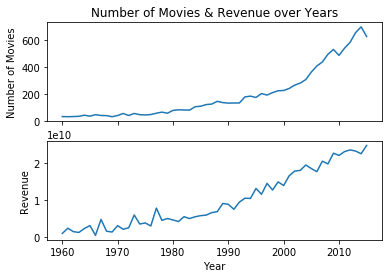

In [27]:
# group the movies based on "release_year"
# sum up the number of movies, the total revenue per year

movies_over_year = data.groupby(data["release_year"]).count()
rev_over_year = data["revenue_adj"].groupby(data["release_year"]).sum()

# generate two plots to see the trend over years
f, plots = plt.subplots(2, sharex=True)
plots[0].set_title("Number of Movies & Revenue over Years")
plots[0].plot(movies_over_year["id"])
plots[0].set_ylabel("Number of Movies")
plots[1].plot(rev_over_year)
plots[1].set_xlabel("Year")
plots[1].set_ylabel("Revenue")
plt.show()

### What are the popular genres (top 5) since 2010?

In [62]:
genre_count = []   # array to store the results

for year in range(2010,2016):
    
    # group data yearly
    yearly_data = data.loc[data["release_year"] == year]
    
    # create a dictionary listing out the genres, reset every year
    genre_dict = {"Action": 0, "Adventure": 0, "Animation": 0, "Comedy": 0, "Crime": 0, 
                  "Documentary": 0, "Drama": 0, "Science Fiction": 0, "Thriller": 0, 
                  "Fantasy": 0, "Western": 0, "Family": 0, "Foreign": 0, "Music": 0, 
                  "Mystery": 0, "Romance": 0, "War": 0, "History": 0, "Horror": 0, "TV Movie": 0}
    
    # count how many time a particular genre occurs, note that one movie can have multiple genres
    for genres in yearly_data["genres"]:
        for genre in genres.split("|"):
            genre_dict[genre] += 1
    
    # get the top 5 genres and store it
    genre_count_yearly = pd.DataFrame(list(genre_dict.items()), columns=["Genre", "Count"]).sort_values(by=["Count"], ascending=False).reset_index(drop=True)[:5]
    genre_count.append(genre_count_yearly)

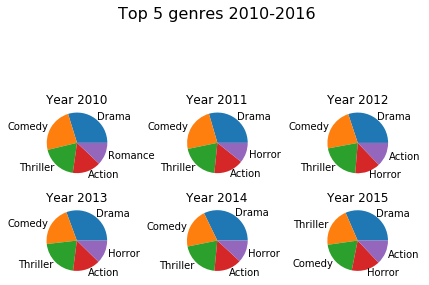

In [117]:
the_grid = GridSpec(3, 3)

# plot a pie chart every year to see the ratio of each genre
for i in range(2):
    for j in range(3):
        plt.subplot(the_grid[i+1, j], aspect=1)
        plt.pie(genre_count[i*3+j]["Count"], labels=genre_count[i*3+j]["Genre"]) 
        plt.axis('equal')
        plt.title("Year "+str(2010+i*3+j))

plt.suptitle("Top 5 genres 2010-2016", size=16)
plt.tight_layout()
plt.show()    

<a id='conclusions'></a>
## Conclusions

> **Q1 Analysis**: It is very clear from the graph that both the number of movies and sum revenue have increasing trend over years. Although there were some fluctuations, generally speaking the movie industry has been booming since the 90s, tripling the number of movies and doubling the revenue within 20 years. As people become more affluent and spend more money on leisure acticities and entertainment, the movies industry grows accordingly.  

> **Q2 Analysis**: From the series of pie charts, it is clear that people's taste have not changed much since 2010. The most popular genre was "Drama" across these years. "Comedy" was mostly the second most popular, but surpassed by "Thriller" in the year of 2015. There were also "Action", "Horror" and "Romance" making their way to the Top 5 for certain years. Probably most people watch movies for fun and entertainment, and thus the producers would like to make and publicize their movies to be these genres that are likely to be more viewed and profitable. 

> *Limitations:* The analysis of genre is very limited, and the definition of "popularity" should not only base on the number of occurence, but also the rating and revenue etc. 